In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [12]:
data = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
print(data.head)

y = data.pop("quality")
X = data

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)




<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [13]:
from sklearn.ensemble import RandomForestClassifier
sgd_clf = RandomForestClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

y_pred = sgd_clf.predict(X_test)

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")


array([0.5924933 , 0.64343164, 0.67828418])

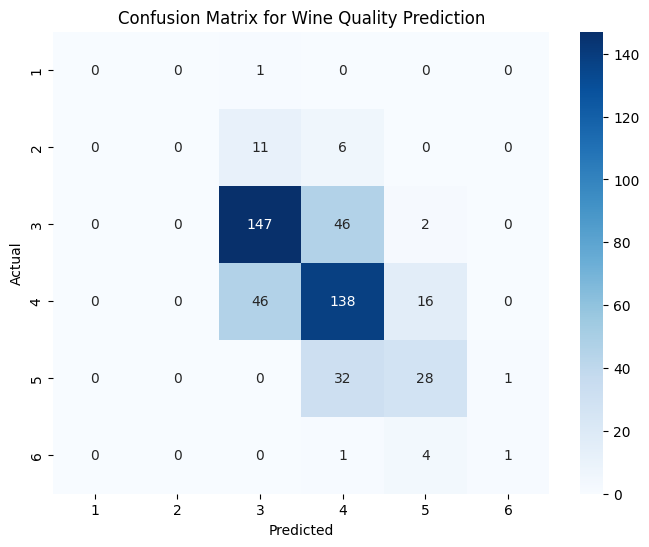

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matr = confusion_matrix(y_test, y_pred)

labels = [1, 2, 3, 4, 5, 6]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matr, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Wine Quality Prediction')
plt.show()


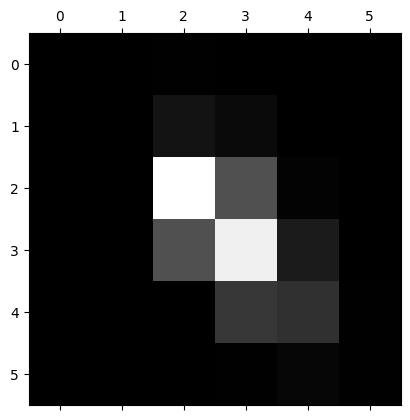

In [18]:
import matplotlib.pyplot as plt
plt.matshow(conf_matr, cmap=plt.cm.gray)
plt.show()

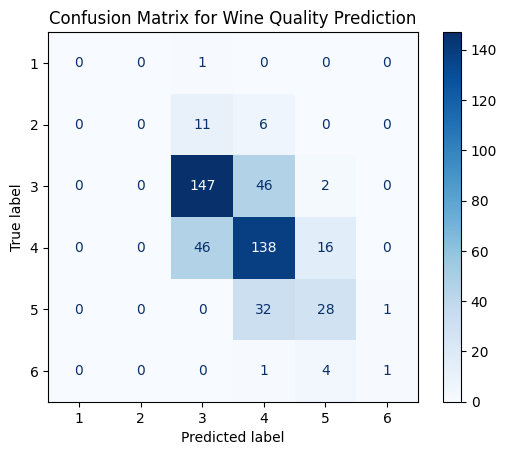

In [22]:
import matplotlib.pyplot as plt
from sklearn import metrics

conf_matr = metrics.confusion_matrix(y_test, y_pred)

labels = [1, 2, 3, 4, 5, 6]

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matr,
                                            display_labels=labels)

cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix for Wine Quality Prediction")
plt.show()
